In [23]:
from bindsnet.network import load_network
from bindsnet.encoding import poisson
from IPython.display import clear_output
import matplotlib.pyplot as plt
import torch
from encoder import *

In [2]:
track2 = encode('dataset/track2.csv', int(50000), 100)

100%|██████████| 1070/1070 [00:52<00:00, 20.23it/s]


In [20]:
network = load_network('trained.net')
network.connections[('X', 'Ae')].update_rule = None
exc_monitor = network.monitors['exc']

In [21]:
time = 500

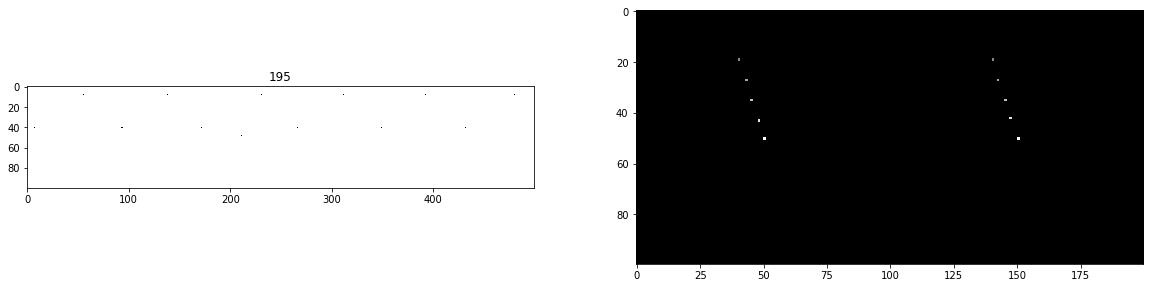

In [ ]:
for i in range(1, len(track2)):
    orig = torch.cat((track2[i-1], track2[i]), dim=1)
    pt = orig.view(-1)
    pt = poisson(pt, time)
    
    inpts = {'X': pt}
    network.run(inpts=inpts, time=time)
    spikes = exc_monitor.get('s')
    
    fig = plt.figure(figsize=(20, 20))
    plt.subplot(2, 2, 1)
    plt.title(f'{i}')
    plt.imshow(spikes, cmap='binary')
    plt.subplot(2, 2, 2)
    plt.imshow(orig, cmap='gist_gray')
    plt.show()
    
    clear_output(wait=True)